In [15]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from rich.console import Console
from rich import print
console = Console()
import config
import os
import pandas as pd
from PIL import Image
plt.style.use("ggplot")
%matplotlib inline

In [7]:
!python print_md.py

╔═════════════════════════════════════════════════════════════════════════════╗
║                              Download Dataset                               ║
╚═════════════════════════════════════════════════════════════════════════════╝

BaiDu Network Disk                                                             

Get Data                                                                       

passward kwj4                                                                  

if you have downloaded the dataset,the document structure should be as follows:

┌─────────────────────────────────────────────────────────────────────────────┐
│ ../                                                                         │
│     ./train_images                                                          │
│     ./test_images                                                           │
│     train.csv                                                               │
│     sample_submission.csv        

In [10]:
def histequality(img):
    for c in range(3):
        img[:,:,c] = cv.equalizeHist(img[:,:,c])
    return img

In [12]:
def pil_to_numpy(array):return np.asarray(array)
def numpy_to_pil(array):return Image.from_numpy(array)

In [14]:
root = config.parameter.get("ROOT")
console.log(os.listdir(root))

[19:48:36] [                                                                  ]8;id=38149;file://C:\Users\lenovo\AppData\Local\Temp\ipykernel_4056\2302850522.py\2302850522.py]8;;\:]8;id=804264;file://C:\Users\lenovo\AppData\Local\Temp\ipykernel_4056\2302850522.py#2\2]8;;\
               'dataset.tar.gz',                                                             
               'duanfeixiong_3c01751c.zip',                                                  
               'LV-MHP-v1',                                                                  
               'LV-MHP-v1.zip',                                                              
               'sample_submission.csv',                                                      
               'test_images',                                                                
               'train.csv',                                                                  
               'train_images'                                                                
           ]

In [16]:
df = pd.read_csv(os.path.join(root,"train.csv"))
df.head()

,image,labels
0,800113bb65efe69e.jpg,healthy
1,8002cb321f8bfcdf.jpg,scab frog_eye_leaf_spot complex
2,80070f7fb5e2ccaa.jpg,scab
3,80077517781fb94f.jpg,scab
4,800cbf0ff87721f8.jpg,complex


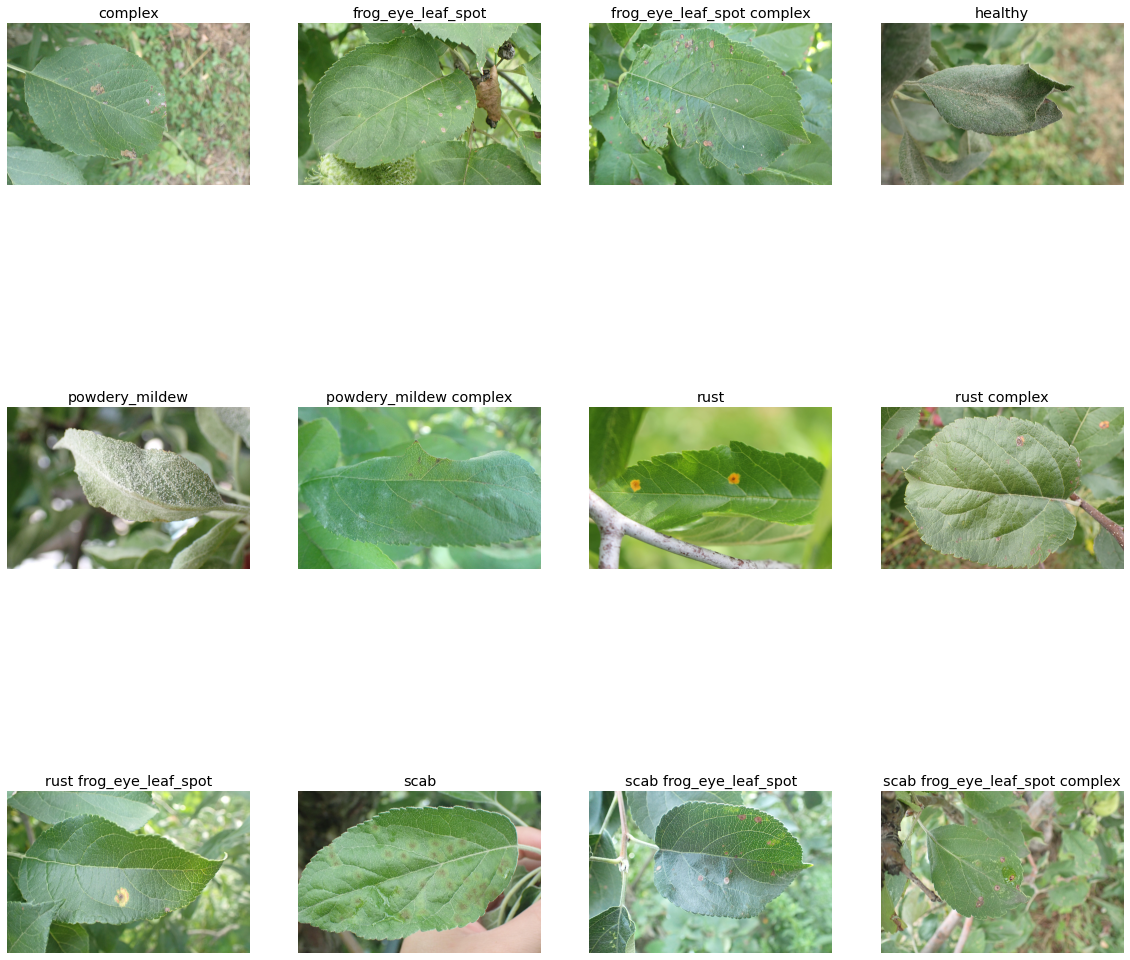

In [18]:
image_path = os.path.join(root,"train_images")
unique_label = np.unique(df['labels'])
plt.figure(figsize = (20,20))
for i,l in enumerate(unique_label):
    plt.subplot(3,4,i + 1)
    name = df[df['labels'] == l].values[0,0]
    plt.title(l)
    img = cv.imread(os.path.join(image_path,name))
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    plt.grid(False)
plt.show()

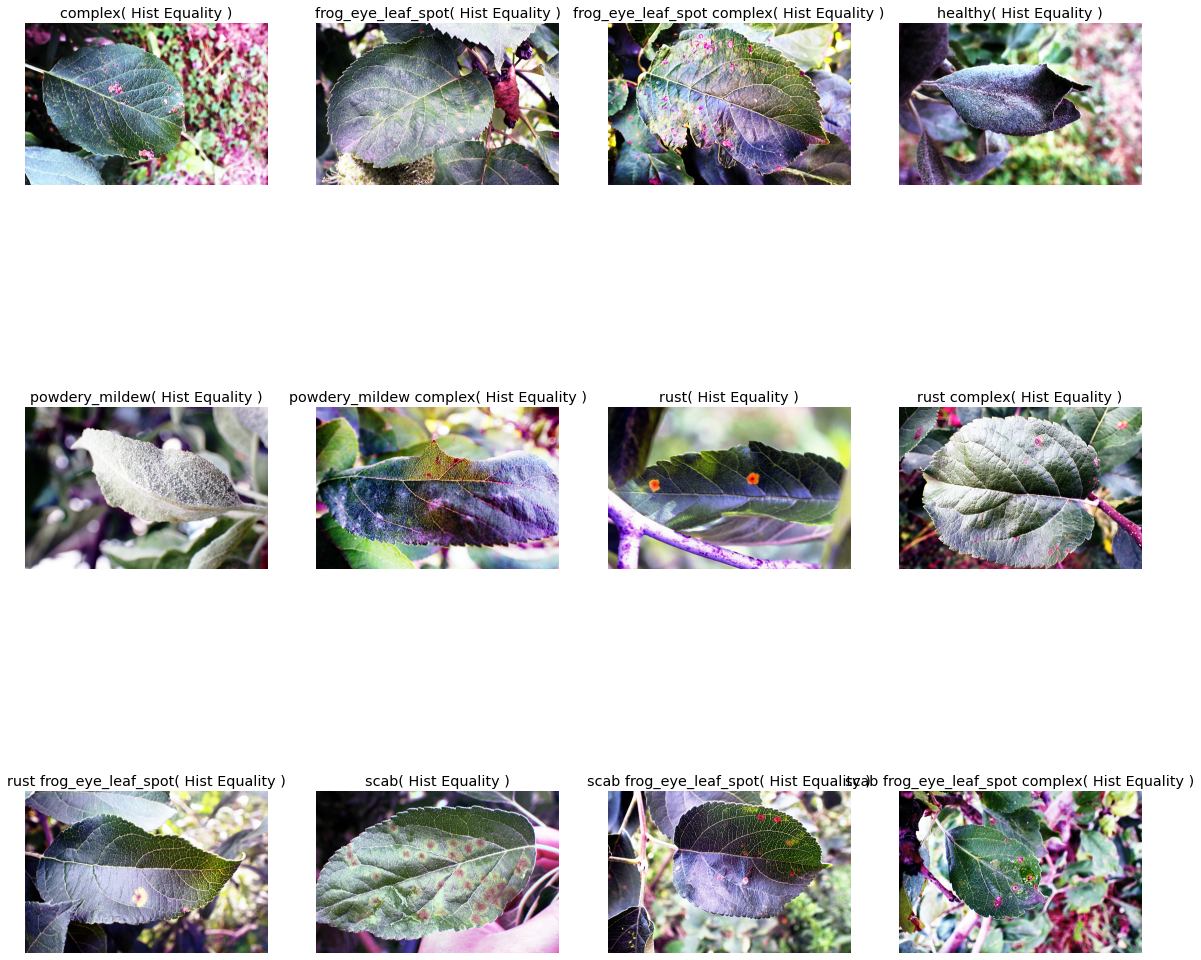

In [19]:
unique_label = np.unique(df['labels'])
plt.figure(figsize = (20,20))
for i,l in enumerate(unique_label):
    plt.subplot(3,4,i + 1)
    name = df[df['labels'] == l].values[0,0]
    plt.title(l + "( Hist Equality )")
    img = cv.imread(os.path.join(image_path,name))
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    img = histequality(img)
    plt.imshow(img)
    plt.axis("off")
    plt.grid(False)
plt.show()

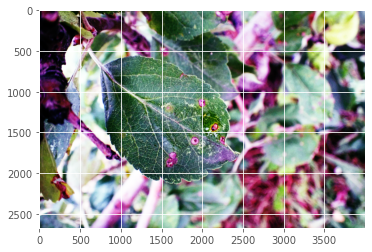

In [22]:
img = cv.imread(os.path.join(image_path,name))
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img = histequality(img)
plt.imshow(img)

In [24]:
## feature extraction network